Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач по исследованию нескольких аспектов мобильного приложения:
1. В первую очередь, его интересует показатель <strong>retention</strong>. Напишите функцию для его подсчета.
2. Помимо этого, в компании провели <strong>A/B тестирование</strong> наборов акционных предложений. На основе имеющихся данных определите, <strong>какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение</strong>.
3. <strong>Предложите метрики для оценки результатов</strong> последнего прошедшего тематического события в игре.

_<h2>Задание 1_

_**Retention**_ – один из самых важных показателей в компании. Ваша задача – **написать функцию, которая будет считать retention игроков** (по дням от даты регистрации игрока)

Данные лежат в папке shared и имеют следующую структуру:
- shared/problem1-reg_data.csv – данные о времени регистрации
- shared/problem1-auth_data.csv – данные о времени захода пользователей в игру

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
# Пути до данных
path_to_reg  = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-pjatakova/shared/problem1-reg_data.csv'
path_to_auth = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-pjatakova/shared/problem1-auth_data.csv'

In [3]:
# Считываем данные
reg_df = pd.read_csv(path_to_reg, sep=';')
auth_df = pd.read_csv(path_to_auth, sep=';')

<h3>START. Предварительный анализ и обработка данных

<h4> 1. reg_df - данные о времени регистрации

In [4]:
reg_df.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [5]:
# Размер таблицы
reg_df.shape

(1000000, 2)

In [6]:
# Тип данных
reg_df.dtypes

reg_ts    int64
uid       int64
dtype: object

In [7]:
# Общая информация
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


Поскольку данные в столбце **reg_ts** подразумевают под собой время регистрации, целесообразно преобразовать данные в формат datetime

In [8]:
reg_df ['reg_ts'] = pd.to_datetime(reg_df['reg_ts'], unit='s').dt.date

In [9]:
reg_df.describe()

,uid
count,1.000000e+06
mean,5.552354e+05
std,3.206011e+05
min,1.000000e+00
25%,2.776438e+05
50%,5.550455e+05
75%,8.329712e+05
max,1.110622e+06


In [10]:
reg_df.head()

,reg_ts,uid
0,1998-11-18,1
1,1999-07-22,2
2,2000-01-13,3
3,2000-05-28,4
4,2000-09-16,5


<h4> 2. auth_df - данные о времени захода пользователей в игру

In [11]:
auth_df.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [12]:
# Размер таблицы
auth_df.shape

(9601013, 2)

In [13]:
# Тип данных
auth_df.dtypes

auth_ts    int64
uid        int64
dtype: object

In [14]:
# Общая информация
auth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


Поскольку данные в столбце **auth_ts** подразумевают под собой время захода в игру, целесообразно преобразовать данные в формат datetime

In [15]:
auth_df ['auth_ts'] = pd.to_datetime(auth_df['auth_ts'], unit='s').dt.date

In [16]:
auth_df.describe()

,uid
count,9.601013e+06
mean,3.347198e+05
std,2.832669e+05
min,1.000000e+00
25%,9.599700e+04
50%,2.579210e+05
75%,5.190250e+05
max,1.110622e+06


In [17]:
auth_df.head()

,auth_ts,uid
0,1998-11-18,1
1,1999-07-22,2
2,1999-07-25,2
3,1999-07-31,2
4,1999-08-05,2


<h4> 3. Создадим таблицу reg_auth для дальнейшей работы - смерджим reg_df с auth_df по столбцу uid

In [18]:
reg_auth = reg_df.merge(auth_df, on='uid')
reg_auth.head()

,reg_ts,uid,auth_ts
0,1998-11-18,1,1998-11-18
1,1999-07-22,2,1999-07-22
2,1999-07-22,2,1999-07-25
3,1999-07-22,2,1999-07-31
4,1999-07-22,2,1999-08-05


In [19]:
# Выполним проверку мёрджа. Посмотрим на общее количество записей - количество раз, когда пользователи зашли в игру
reg_auth.uid.count()

9601013

In [20]:
# Выполним проверку мёрджа. Посмотрим на количество уникальных записей - количество регистраций
reg_auth.uid.nunique()

1000000

In [21]:
reg_auth.dtypes

reg_ts     object
uid         int64
auth_ts    object
dtype: object

In [22]:
reg_auth.describe()

,uid
count,9.601013e+06
mean,3.347198e+05
std,2.832669e+05
min,1.000000e+00
25%,9.599700e+04
50%,2.579210e+05
75%,5.190250e+05
max,1.110622e+06


<h3> 1. Подсчет retention rate и создание функции

__!!! Retention rate показывает долю вернувшихся людей от изначально пришедших__

Retention Rate = (Кол-во клиентов на конец периода - Кол-во клиентов, приобретенных за весь период)/Кол-во клиентов на начало периода * 100%

__ИЛИ__

Retention Rate = (Количество вернувшихся клиентов/Общее количество клиентов на начало периода)*100%

In [23]:
# Первая дата регистрации
reg_auth.reg_ts.min()

datetime.date(1998, 11, 18)

In [24]:
# Последняя дата регистрации
reg_auth.reg_ts.max()

datetime.date(2020, 9, 23)

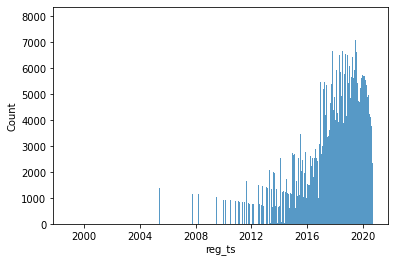

In [25]:
# Посмотрим на количество регистраций по годам - видим положительную динамику из года в год. Лидеры - 2018-2020 гг.
sns.histplot(data=reg_auth, x='reg_ts')

In [26]:
reg_auth.head()

,reg_ts,uid,auth_ts
0,1998-11-18,1,1998-11-18
1,1999-07-22,2,1999-07-22
2,1999-07-22,2,1999-07-25
3,1999-07-22,2,1999-07-31
4,1999-07-22,2,1999-08-05


Напишем функцию для подсчета __retention rate__ по переменным __start_date, end_date__

In [27]:
def retention_rate(start_date, end_date):
    """
    Функция для подсчета Retention Rate по переменным start_date и end_date.
    """

# Задаем необходимый формат данных для переменных
    start_date = datetime.strptime(start_date, '%Y-%m-%d').date()
    end_date = datetime.strptime(end_date, '%Y-%m-%d').date()

# Отбираем в df необходимые значения, попадающие в промежуток между start_date и end_date (по reg_ts и по auth_ts)
    df= reg_auth[(reg_auth['reg_ts'] >= start_date) & (reg_auth['auth_ts'] <= end_date)]

# Добавим столбец в df, в котором отражено количество дней, прошедших с момента регистрации до входа в приложение
    df['date_diff'] = (df.auth_ts - df.reg_ts).dt.days

# Группируем df по дате регистрации reg_ts и дням date_diff, рассчитываем уникальные значения uid
    df = df.groupby(['reg_ts', 'date_diff']).agg({'uid': 'nunique'}) 
    
# Создаём сводую таблицу, где рассчитываем retention_rate
# df, созданная с помощью pivot имеет колонки date_diff, строки reg_ts, значения uid
# с помощью divide делим df на 1ый элемент - строку => получаем retention_rate
    df = df.reset_index().pivot(index='reg_ts', columns='date_diff', values='uid')
    df = df.divide(df[0], axis=0).mul(100).round(2)
    
# Удаляем первую строку, чтобы получить корректные значения 
# и не включать первоначальное удержание после регистрации в расчет
    df_retention = df.drop(labels=[0], axis=1)
    return df_retention

Напишем функцию для визуализации retention rate с помощью тепловой карты sns.heatmap

In [28]:
def retention_rate_visualisation(df_retention):
    """
    Функция для визуализации Retention Rate по данным, полученным в df_retention.
    """
    plt.figure(figsize=(15, 9))
    plt.title('Retention rate')
    sns.heatmap(data=df_retention, annot=True, cmap='YlOrBr')

<h3>2. Применение функции подсчета retention rate на данных за 1 месяц с 01.05.2016 по 31.05.2016, построение графика

Построение __сводной таблицы с показателями retention rate__ с помощью функции __retention_rate(start_date, end_date)__

In [29]:
start_date = '2016-05-01'
end_date = '2016-05-31'

In [30]:
df_retention = retention_rate(start_date, end_date)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df_retention

date_diff,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
reg_ts,,,,,,,,,,,,,,,,,,,,,
2016-05-01,3.42,4.27,5.98,3.42,7.69,5.98,3.42,6.84,4.27,3.42,...,3.42,5.13,3.42,0.85,4.27,2.56,2.56,3.42,4.27,2.56
2016-05-02,NaN,7.63,4.24,5.93,5.08,7.63,4.24,6.78,5.08,1.69,...,3.39,3.39,3.39,3.39,4.24,1.69,1.69,2.54,4.24,NaN
2016-05-03,1.71,3.42,4.27,0.85,5.98,8.55,5.98,3.42,4.27,4.27,...,4.27,1.71,5.13,5.98,3.42,3.42,5.13,4.27,NaN,NaN
2016-05-04,2.54,0.85,5.08,5.93,6.78,10.17,5.08,3.39,5.08,4.24,...,1.69,6.78,3.39,1.69,5.08,2.54,4.24,NaN,NaN,NaN
2016-05-05,1.69,2.54,1.69,6.78,11.02,5.93,5.08,7.63,5.08,2.54,...,4.24,5.08,5.93,4.24,3.39,2.54,NaN,NaN,NaN,NaN
2016-05-06,0.85,2.54,5.08,5.93,8.47,6.78,5.93,2.54,5.08,5.93,...,0.85,3.39,4.24,3.39,1.69,NaN,NaN,NaN,NaN,NaN
2016-05-07,3.36,4.20,4.20,4.20,5.88,7.56,5.04,6.72,5.04,4.20,...,3.36,4.20,4.20,3.36,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-08,0.85,3.39,3.39,5.08,4.24,4.24,6.78,0.85,5.93,1.69,...,0.85,5.08,3.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-09,NaN,2.52,4.20,6.72,4.20,9.24,5.88,6.72,5.88,5.88,...,6.72,4.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__График retention rate__ с использованием функции __retention_rate_visualisation(df_retention)__

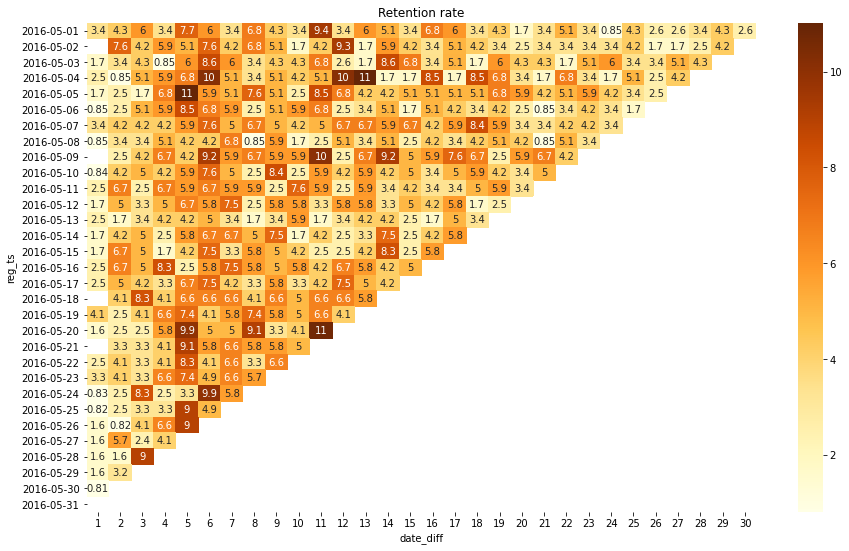

In [32]:
retention_rate_visualisation(df_retention)

<h3> 3. Выводы

На хитмэпе видно, что максимальный retention rate за период с 01.05.2016 по 31.05.2016 характерен для 5-6 и 12-14 дня. Возможно, указанное связано с какими-либо акциями внутри игры, "подарками" за вход в приложение через определенное количество дней. Однако, к концу месяца retention rate снижается. Предположу, что для поддержания retention rate на благоприятном уровне, компании по разработке игр необходимо провести анализ процессов, реализуемых в рамках приложения на 5-6 и 12-14 дни для использования данных механизмов в дальнейшем с определенной периодичностью. 

_<h2>Задание 2_

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. 
Известно, что __ARPU__ в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.
- Какой набор предложений можно считать лучшим? 
- Какие метрики стоит проанализировать для принятия правильного решения и как?

In [33]:
# Импортируем необходимые библиотеки
from scipy import stats
import pingouin as pg
from scipy.stats import chi2_contingency

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [34]:
# Путь до файла
path_to_ab = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-pjatakova/etc/Проект_1_Задание_2.csv'

In [35]:
# Считываем данные
ab_results = pd.read_csv(path_to_ab, sep=';')

<h3>START. Предварительный анализ и обработка данных

In [36]:
# Посмотрим на данные
ab_results.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [37]:
# Размер
ab_results.shape

(404770, 3)

In [38]:
# Тип данных
ab_results.dtypes

user_id       int64
revenue       int64
testgroup    object
dtype: object

In [39]:
# Общая информация
ab_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [40]:
# Статистические характеристики
ab_results.describe()

,user_id,revenue
count,404770.000000,404770.000000
mean,202385.500000,26.083435
std,116847.178567,681.652928
min,1.000000,0.000000
25%,101193.250000,0.000000
50%,202385.500000,0.000000
75%,303577.750000,0.000000
max,404770.000000,37433.000000


In [41]:
ab_results.nunique()

user_id      404770
revenue        1477
testgroup         2
dtype: int64

Для решения задачи необходимо определить, __какая группа (a или b) является тестовой, а какая контрольной__. Посмотрим на данные для каждой из двух групп, найдем платящих пользователей. По условию задачи - *в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.*

<h4> Группа А

In [42]:
ab_results.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [43]:
# Отберем данные по группе А и по столбцу revenue посмотрим, сколько пользователей имеют значения > 0
ab_results.query("testgroup == 'a' & revenue > 0")

,user_id,revenue,testgroup
72,73,351,a
341,342,290,a
385,386,250,a
416,417,37324,a
712,713,255,a
...,...,...,...
404304,404305,360,a
404315,404316,262,a
404543,404544,369,a
404602,404603,251,a


В группе А платящих 1928 человек - __контрольная группа__

<h4> Группа B

In [44]:
# Отберем данные по группе B и по столбцу revenue посмотрим, сколько пользователей имеют значения > 0
ab_results.query("testgroup == 'b' & revenue > 0")

,user_id,revenue,testgroup
160,161,3797,b
377,378,3768,b
386,387,3527,b
551,552,2038,b
913,914,3902,b
...,...,...,...
403843,403844,3383,b
403994,403995,2793,b
404161,404162,2316,b
404193,404194,2998,b


В группе B платящих 1805 человек - __тестовая группа__

<h3>1. Посмотрим на нормальность распределений в тестовой и контрольной группах

<h4> Тестовая группа - группа B

In [45]:
# Отберем пользователей, которые относятся к группе B
test_group_b = ab_results.query("testgroup == 'b'")
# Отберем пользователей, которые относятся к группе B и являются платящими
test_group_b_pay = ab_results.query("testgroup == 'b' & revenue > 0")

In [46]:
test_group_b_pay.revenue.describe()

count    1805.000000
mean     3003.658172
std       572.619709
min      2000.000000
25%      2513.000000
50%      3022.000000
75%      3478.000000
max      4000.000000
Name: revenue, dtype: float64

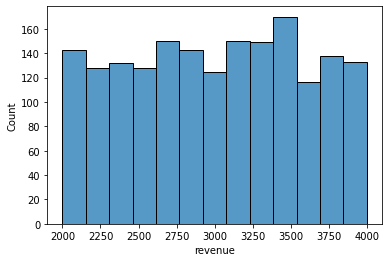

In [47]:
# Посмотрим на распределение revenue в тестовой группе B, нормальное ли оно
sns.histplot(x='revenue', data=test_group_b_pay)

Видно, что распределение revenue в __тестовой группе B__ является НЕНОРМАЛЬНЫМ

<h4> Контрольная группа - группа A

In [48]:
# Отберем пользователей, которые относятся к группе A
control_group_a = ab_results.query("testgroup == 'a'")
# Отберем пользователей, которые относятся к группе A и являются платящими
control_group_a_pay = ab_results.query("testgroup == 'a' & revenue > 0")

In [49]:
control_group_a_pay.revenue.describe()

count     1928.000000
mean      2663.998444
std       9049.039763
min        200.000000
25%        257.000000
50%        311.000000
75%        361.000000
max      37433.000000
Name: revenue, dtype: float64

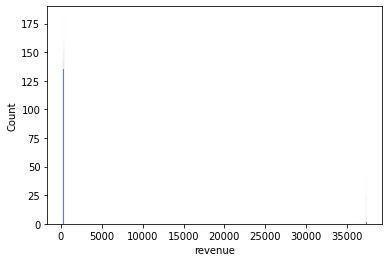

In [50]:
# Посмотрим на распределение revenue в контрольной группе A, нормальное ли оно
sns.histplot(x='revenue', data=control_group_a_pay)

Видно, что распределение revenue в __контрольной группе A__ имеет выбросы в данных (за границей revenue = 35000) в результате возможного неправильного сплитования пользователей для проведения А/В тестирования, которые искажают картинку. Попробуем их исключить и посмотреть на распределение данных

In [51]:
# Создадим таблицу, в которой будет отсутствовать информация о выбросах
control_group_a_pay_no_emissions = control_group_a_pay.query('revenue <= 35000')

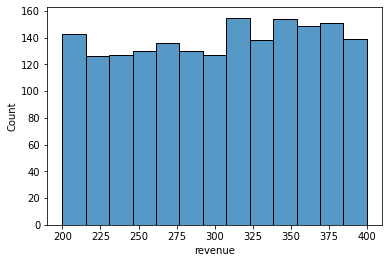

In [52]:
# Посмотрим на распределение revenue в контрольной группе A без учета выбросов, нормальное ли оно
sns.histplot(x='revenue', data=control_group_a_pay_no_emissions)

Видим, что распределение revenue в __контрольной группе А__ является НЕНОРМАЛЬНЫМ

Из-за наличия выбросов в данных стоит посмотреть на их влияние и на возможность исключения из данных. 

In [53]:
# Доля выбросов в revenue контрольной группы А с платящими пользователями
control_group_a_pay.query('revenue >= 35000').revenue.sum()/control_group_a_pay.revenue.sum()*100

89.37077665950378

In [54]:
# Доля выбросов в user_id
control_group_a_pay.query('revenue >= 35000').user_id.count()/control_group_a_pay.user_id.count()*100

6.379668049792531

Видим, что 6,4% пользователей, которые являются "выбросами" приносят 89,4% revenue. Достаточно высокая доля, исключить мы их не можем

<h3>2. Определение метрик, расчет показателей, стат. анализ

<h4> I. ARPU (average revenue per user) - средняя выручка на одного пользователя

ARPU = Доход за определенный период/Количество уникальных посетителей за тот же период

In [55]:
# Сразу проверим дисперсии на гомогенность
pg.homoscedasticity(data=ab_results, dv='revenue', group='testgroup')

,W,pval,equal_var
levene,0.389629,0.532495,True


Поскольку распределение не является нормальным, гомогенность дисперсий соблюдается, а объем данных достаточно большой, будем использовать __t-тест__

*Гипотезы:*
- __H0__ - ARPU контрольной и ARPU тестовой группы __не различаются__
- __H1__ - ARPU контрольной и ARPU тестовой группы __различаются__

In [56]:
# Расчитаем ARPU для контрольной группы А
arpu_control_group_a = control_group_a.groupby('testgroup', as_index=False)\
    .agg({'revenue': 'sum', 'user_id': 'nunique'})
arpu_control_group_a = arpu_control_group_a.rename(columns={'user_id': 'number_unique_users'})
arpu_control_group_a['ARPU'] = arpu_control_group_a.revenue/arpu_control_group_a.number_unique_users

In [57]:
arpu_control_group_a

,testgroup,revenue,number_unique_users,ARPU
0,a,5136189,202103,25.41372


In [58]:
# Расчитаем ARPU для тестовой группы B
arpu_test_group_b = test_group_b.groupby('testgroup', as_index=False)\
    .agg({'revenue': 'sum', 'user_id': 'nunique'})
arpu_test_group_b = arpu_test_group_b.rename(columns={'user_id': 'number_unique_users'})
arpu_test_group_b['ARPU'] = arpu_test_group_b.revenue/arpu_test_group_b.number_unique_users

In [59]:
arpu_test_group_b

,testgroup,revenue,number_unique_users,ARPU
0,b,5421603,202667,26.751287


In [60]:
# ARPU в тестовой группе B больше, чем в контрольной группе A на 5,3%
((arpu_test_group_b.ARPU/arpu_control_group_a.ARPU)-1)*100

0    5.263168
Name: ARPU, dtype: float64

In [61]:
# или на 1,3
arpu_test_group_b.ARPU-arpu_control_group_a.ARPU

0    1.337567
Name: ARPU, dtype: float64

__Т-тест__

In [62]:
# T-тест для ARPU
ttest_arpu = stats.ttest_ind(control_group_a.revenue, test_group_b.revenue)
p_arpu = ttest_arpu.pvalue
# Значение p-value для T-теста расчета ARPU
p_arpu

0.532494858971837

In [63]:
prob = 0.95
alpha = 1.0 - prob
if p_arpu <= alpha:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Не отклоняем H0


__Вывод:__  p-value составляет 0,53, что больше 0.05. Мы не можем отклонить нулевую гипотезу H0 о том, что ARPU контрольной и ARPU тестовой группы не различаются. 

<h4> II. ARPPU (average revenue per paying user) - показывает среднюю прибыль от одного платящего пользователя за определенный период времени

ARPPU = Доход за определенный период/Количество платящих пользователей за тот же период

In [64]:
# Сразу проверим дисперсии на гомогенность
pg.homoscedasticity(data=ab_results.query('revenue > 0'), dv='revenue', group='testgroup')

,W,pval,equal_var
levene,80.855674,3.779690e-19,False


Поскольку распределение не является нормальным, гомогенность дисперсий не соблюдается, а объем данных достаточно большой, будем использовать __t-тест__ с поправкой equal_var=False

*Гипотезы:*
- __H0__ - ARPPU контрольной и ARPPU тестовой группы __не различаются__
- __H1__ - ARPPU контрольной и ARPPU тестовой группы __различаются__

In [65]:
# Расчитаем ARPPU для контрольной группы А
arppu_control_group_a = control_group_a_pay.groupby('testgroup', as_index=False)\
    .agg({'revenue': 'sum', 'user_id': 'count'})
arppu_control_group_a = arppu_control_group_a.rename(columns={'user_id': 'number_of_users'})
arppu_control_group_a['ARPPU'] = arppu_control_group_a.revenue/arppu_control_group_a.number_of_users

In [66]:
arppu_control_group_a

,testgroup,revenue,number_of_users,ARPPU
0,a,5136189,1928,2663.998444


In [67]:
# Расчитаем ARPPU для тестовой группы B
arppu_test_group_b = test_group_b_pay.groupby('testgroup', as_index=False)\
    .agg({'revenue': 'sum', 'user_id': 'count'})
arppu_test_group_b = arppu_test_group_b.rename(columns={'user_id': 'number_of_users'})
arppu_test_group_b['ARPPU'] = arppu_test_group_b.revenue/arppu_test_group_b.number_of_users

In [68]:
arppu_test_group_b

,testgroup,revenue,number_of_users,ARPPU
0,b,5421603,1805,3003.658172


In [69]:
# ARPPU в тестовой группе B больше, чем в контрольной группе A на 12,8%
((arppu_test_group_b.ARPPU/arppu_control_group_a.ARPPU)-1)*100

0    12.749997
Name: ARPPU, dtype: float64

In [70]:
# или на 339,7
arppu_test_group_b.ARPPU-arppu_control_group_a.ARPPU

0    339.659728
Name: ARPPU, dtype: float64

__T-тест__

In [71]:
# T-тест для ARPPU
ttest_arppu = stats.ttest_ind(control_group_a_pay.revenue, test_group_b_pay.revenue, equal_var=False)
p_arppu = ttest_arpu.pvalue
# Значение p-value для T-теста расчета ARPPU
p_arppu

0.532494858971837

In [72]:
prob = 0.95
alpha = 1.0 - prob
if p_arppu <= alpha:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Не отклоняем H0


__Вывод:__  p-value составляет 0,53, что больше 0.05. Мы не можем отклонить нулевую гипотезу H0 о том, что ARPPU контрольной и ARPPU тестовой группы не различаются. 

<h4> III. CR в покупку (conversion rate) - это доля пользователей, которые совершили целевое действие (в нашем случае, совершили покупку)

CR в покупку = (Количество покупок/Общее количество пользователей) × 100%

Для того, чтобы подтвердить или опровергнуть наличие статистически значимых различий CR в двух группах будем использовать __критерий хи-квадрат__

*Гипотезы:*
- __H0__ - CR контрольной и CR тестовой группы __не различаются__
- __H1__ - CR контрольной и CR тестовой группы __различаются__

In [73]:
ab_results.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [74]:
# Создадим таблицу с платящими пользователями с разбивкой по группам
paying_users = ab_results.query("revenue > 0")\
    .groupby('testgroup', as_index=False)\
    .agg({'user_id': 'count'})\
    .rename(columns={'user_id': 'paying_users'})
paying_users

,testgroup,paying_users
0,a,1928
1,b,1805


In [75]:
# Создадим таблицу со всеми пользователями с разбивкой по группам
all_users = ab_results.groupby('testgroup', as_index=False)\
    .agg({'user_id': 'count'})\
    .rename(columns={'user_id': 'all_users'})
all_users

,testgroup,all_users
0,a,202103
1,b,202667


In [76]:
# Смерджим таблицу paying_users с таблицей all_users для дальнейшего расчета CR
cr_analysis = paying_users.merge(all_users, on='testgroup')
cr_analysis

,testgroup,paying_users,all_users
0,a,1928,202103
1,b,1805,202667


In [77]:
# Добавим столбец с расчетом CR
cr_analysis['CR'] = round(cr_analysis.paying_users/cr_analysis.all_users*100, 2)

In [78]:
cr_analysis

,testgroup,paying_users,all_users,CR
0,a,1928,202103,0.95
1,b,1805,202667,0.89


__Проверяем критерием хи-квадрат__

In [79]:
cr_chi2 = chi2_contingency(cr_analysis[['paying_users', 'all_users']])

In [80]:
cr_chi2

(4.294148751290091,
 0.03824373651044168,
 1,
 array([[  1864.48501725, 202166.51498275],
        [  1868.51498275, 202603.48501725]]))

__Вывод:__ p-value составляет 0,038, что меньше 0,05. Указанное позволяет отклонить нулевую гипотезу H0. Существуют  статистически значимые различия между CR в тестовой группе В и контрольной группе А

<h3>3. Общий вывод. Какой набор предложений можно считать лучшим? 

- По показателям ARPU и ARPPU в контрольной и тестовой группах нельзя сказать однозначно, какой набор предложений лучше, поскольку их показатели статистически значимо не отличаются. Однако, в тестовой группе В значения указанных показателей чуть выше, чем в контрольной группе А
- По показателю CR (конверсия в покупку) видно, что его значение в тестовой группе В ниже, чем в контрольной А. Можно сделать вывод о недостаточной эффективности предложений, тестируемых на группе В - количество платежеспособных пользователей снизилось при росте общего количества пользователей. Соответственно, такие предложения лучше не вводить
- Более того, выявлено, что сплитование игроков на группы для проведения А/В тестирования было проведено неправильно, дизайн эксперимента нарушен. Следует провести А/В тестирование заново, пересобрав группы

_<h2>Задание 3_

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. __С помощью каких метрик можно оценить результаты последнего прошедшего события?__

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. __Изменится ли набор метрик оценки результата? Если да, то как?__

<h3> !!! Результаты выполнения данного задания отражены в презентационном материале

*Ссылка на гугл-диск:* https://drive.google.com/file/d/1UL6SSTLkW2dEO6IxWcwaVVwU5paqVM2M/view?usp=sharing